In [8]:
#Data Exploration
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset
data = pd.read_csv('data.csv')

In [3]:
# 1. Inspecting the dataset
# Check the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

Dataset Preview:
           hsi_id         0         1         2         3         4         5  \
0  imagoai_corn_0  0.416181  0.396844  0.408985  0.372865  0.385293  0.365390   
1  imagoai_corn_1  0.415797  0.402956  0.402564  0.396014  0.397192  0.389634   
2  imagoai_corn_2  0.389023  0.371206  0.373098  0.373872  0.361056  0.349709   
3  imagoai_corn_3  0.468837  0.473255  0.462949  0.459335  0.461672  0.459824   
4  imagoai_corn_4  0.483352  0.487274  0.469153  0.487648  0.464026  0.451152   

          6         7         8  ...       439       440       441       442  \
0  0.355226  0.343350  0.344837  ...  0.710280  0.717482  0.715078  0.705379   
1  0.375671  0.363689  0.373883  ...  0.684011  0.697271  0.701995  0.696077   
2  0.333882  0.330841  0.328925  ...  0.683054  0.669286  0.663179  0.676165   
3  0.458194  0.427737  0.415360  ...  0.742782  0.730801  0.736787  0.730044   
4  0.458229  0.440782  0.426193  ...  0.770227  0.773013  0.761431  0.763488   

        443    

In [4]:
# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())


Missing values per column:
hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64


In [5]:
# Check basic statistics of the dataset
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
                0           1           2           3           4           5  \
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean     0.443118    0.440761    0.433814    0.426122    0.418990    0.412432   
std      0.044719    0.045520    0.045764    0.046070    0.045405    0.044727   
min      0.311182    0.295321    0.284064    0.282054    0.296702    0.286860   
25%      0.410456    0.404310    0.397038    0.389029    0.382102    0.377157   
50%      0.449105    0.442651    0.434215    0.425074    0.417075    0.411872   
75%      0.480245    0.478822    0.473158    0.464947    0.459232    0.452198   
max      0.556287    0.530168    0.528774    0.533202    0.511909    0.501786   

                6           7           8           9  ...         439  \
count  500.000000  500.000000  500.000000  500.000000  ...  500.000000   
mean     0.405868    0.399815    0.394038    0.389664  ...    0.741255   
std      0.044528    0.0437

In [7]:
#Handlinng missing values using mean for numeric columns only
for column in data.select_dtypes(include=np.number).columns:
    data[column].fillna(data[column].mean(), inplace=True)

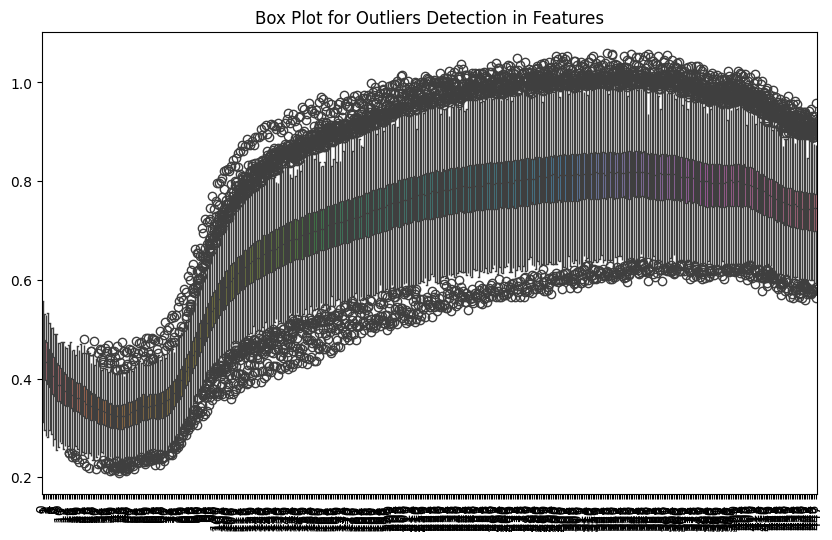

In [9]:
# Checking for inconsistencies or outliers using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.iloc[:, :-1])  # Exclude target column if it is the last column
plt.title("Box Plot for Outliers Detection in Features")
plt.xticks(rotation=90)
plt.show()

In [12]:
# 2. Data Normalization/Standardization
# Separate features (X) and target (y)
X = data.iloc[:, 1:-1]  # Here we excluded 1st column because it has sting values
y = data.iloc[:, -1]

In [13]:
# Normalize or Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

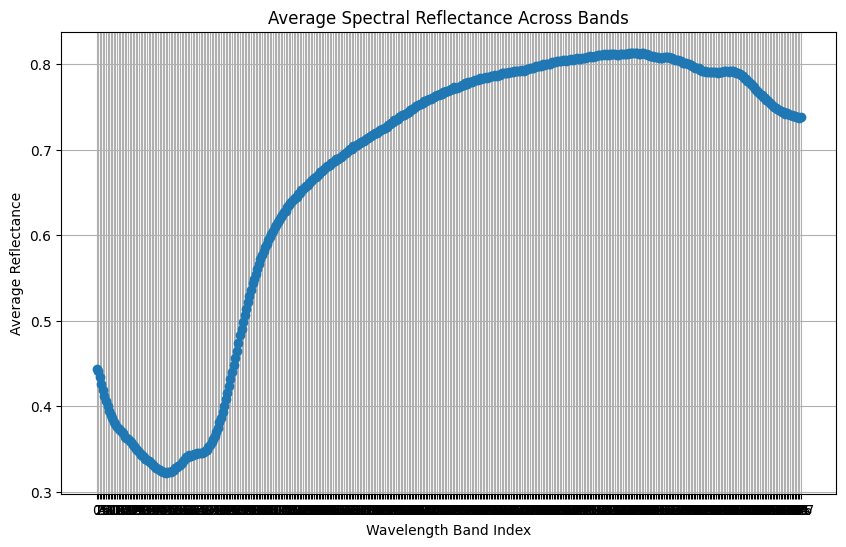

In [14]:
# 3. Data Visualization
# Line plot for average reflectance across wavelength bands
mean_reflectance = X.mean(axis=0)
plt.figure(figsize=(10, 6))
plt.plot(mean_reflectance, marker='o', linestyle='-')
plt.title("Average Spectral Reflectance Across Bands")
plt.xlabel("Wavelength Band Index")
plt.ylabel("Average Reflectance")
plt.grid()
plt.show()

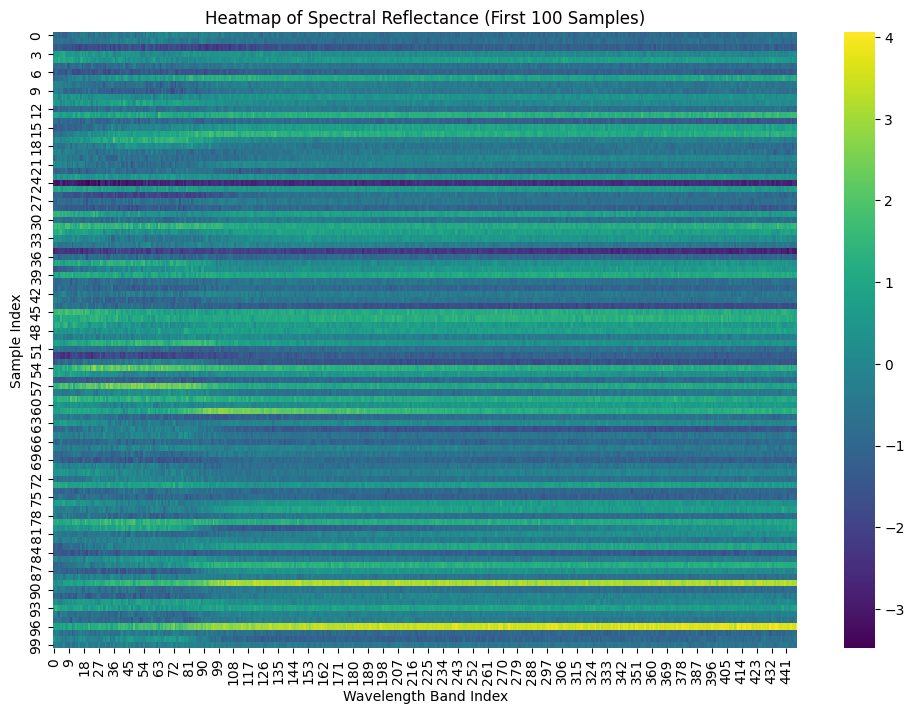

In [15]:
# Heatmap for comparing spectral data of first 100 samples
plt.figure(figsize=(12, 8))
sns.heatmap(X_scaled[:100], cmap='viridis', cbar=True)
plt.title("Heatmap of Spectral Reflectance (First 100 Samples)")
plt.xlabel("Wavelength Band Index")
plt.ylabel("Sample Index")
plt.show()

In [16]:
print("\nData Exploration and Preprocessing Complete.")


Data Exploration and Preprocessing Complete.


In [17]:
#2. Dimensionality Reduction
# Import required libraries
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [18]:
# 1. Principal Component Analysis (PCA)
# Apply PCA to the normalized dataset (X_scaled)
pca = PCA(n_components=3)  # Reducing to 3 dimensions
X_pca = pca.fit_transform(X_scaled)

In [19]:
# Report the variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()
print("Explained Variance by Top Components:", explained_variance)
print("Cumulative Variance Explained:", cumulative_variance)

Explained Variance by Top Components: [0.87077909 0.05849069 0.02112294]
Cumulative Variance Explained: [0.87077909 0.92926978 0.95039272]


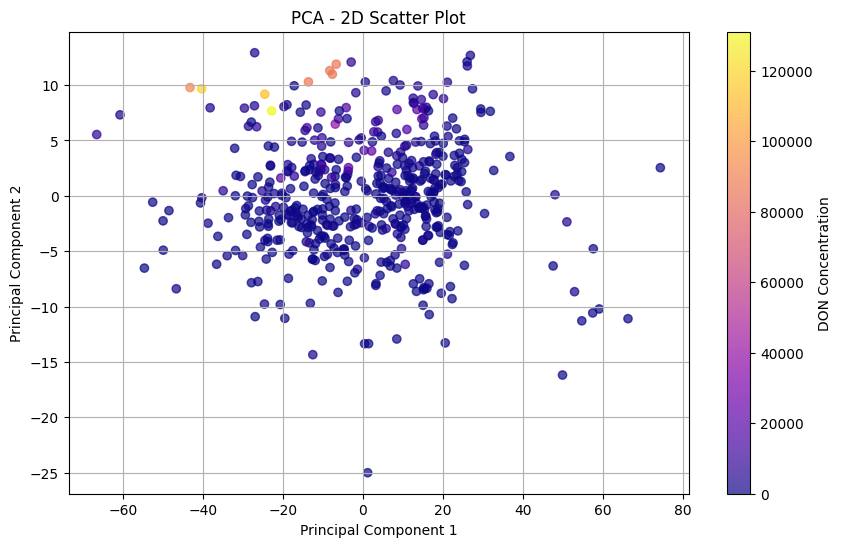

In [24]:
# Visualize PCA (2D Scatter Plot for the first two components)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='plasma', alpha=0.7)
plt.title("PCA - 2D Scatter Plot")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='DON Concentration')
plt.grid()
plt.show()

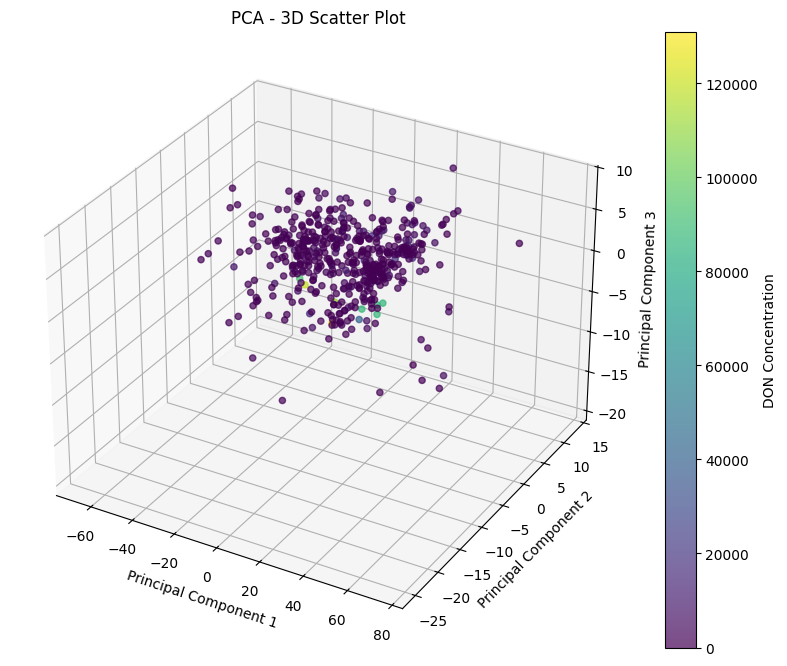

In [21]:
# 3D Visualization of the first three components (optional)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis', alpha=0.7)
plt.title("PCA - 3D Scatter Plot")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.colorbar(sc, label='DON Concentration')
plt.show()

In [25]:
#Model Training
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [26]:
# 1. Split the dataset
# Assuming X_scaled is the normalized feature matrix and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [27]:
# Print the shapes of training and testing sets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (400, 448), (400,)
Testing set shape: (100, 448), (100,)


In [28]:
# 2. Define a Deep Learning Model (Neural Network)
# Initialize a Sequential model
model = Sequential()

In [29]:
# Input layer with 64 neurons
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))

In [30]:
# Hidden layer with 32 neurons
model.add(Dense(32, activation='relu'))

In [31]:
# Dropout layer to prevent overfitting
model.add(Dropout(0.3))

In [32]:
# Output layer (since this is regression, we use one output neuron and no activation)
model.add(Dense(1, activation='linear'))

In [33]:
# 3. Compile the model
# Use Mean Squared Error (MSE) as the loss function for regression problems
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

In [34]:
# 4. Model Training
# Add Early Stopping to monitor validation loss and stop if performance does not improve
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [35]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # Use 20% of training data for validation
    epochs=100,  # Number of epochs (can be adjusted)
    batch_size=32,  # Number of samples per batch
    callbacks=[early_stopping],
    verbose=1  # Displays training progress
)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 164859184.0000 - mae: 2883.2634 - val_loss: 203197472.0000 - val_mae: 4085.4050
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 147287424.0000 - mae: 2987.1855 - val_loss: 203145584.0000 - val_mae: 4080.7358
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 92903176.0000 - mae: 2651.9265 - val_loss: 203078784.0000 - val_mae: 4074.4558
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 156583264.0000 - mae: 3133.3823 - val_loss: 202983056.0000 - val_mae: 4065.5542
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 190173680.0000 - mae: 3403.6111 - val_loss: 202863232.0000 - val_mae: 4054.0125
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 139555920.0000 - mae: 3012.9109 - val_loss: 202695936.0000 - val_mae: 4037.2134
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 100118728.0000 - mae: 2604.9534 - val_loss: 202500576.0000 - val_mae: 4022.4106
Epoch 8/100
10/10 ━━━

In [36]:
# 5. Model Evaluation
# Predict on test data
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


In [37]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [38]:
# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 3750.241255583763
Root Mean Squared Error (RMSE): 11389.646268434584
R² Score: 0.5359260277687894


In [39]:
# 6. Visualize Training History
import matplotlib.pyplot as plt

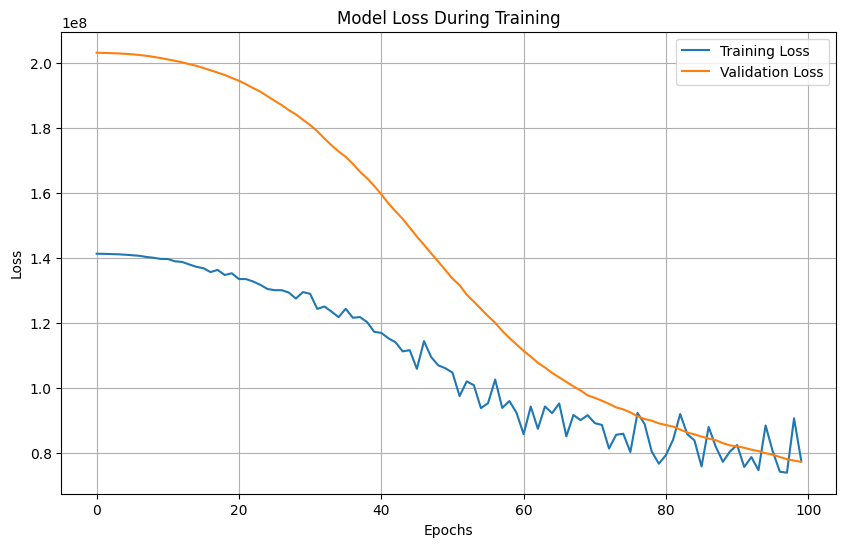

In [40]:
# Plot loss (training and validation)
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#4. Model Evaluation

In [41]:
# Import necessary libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [42]:
# 1. Predict on Test Data
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [43]:
# 2. Calculate Regression Metrics
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R² Score

In [44]:
# Print Regression Metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 3750.241255583763
Root Mean Squared Error (RMSE): 11389.646268434584
R² Score: 0.5359260277687894


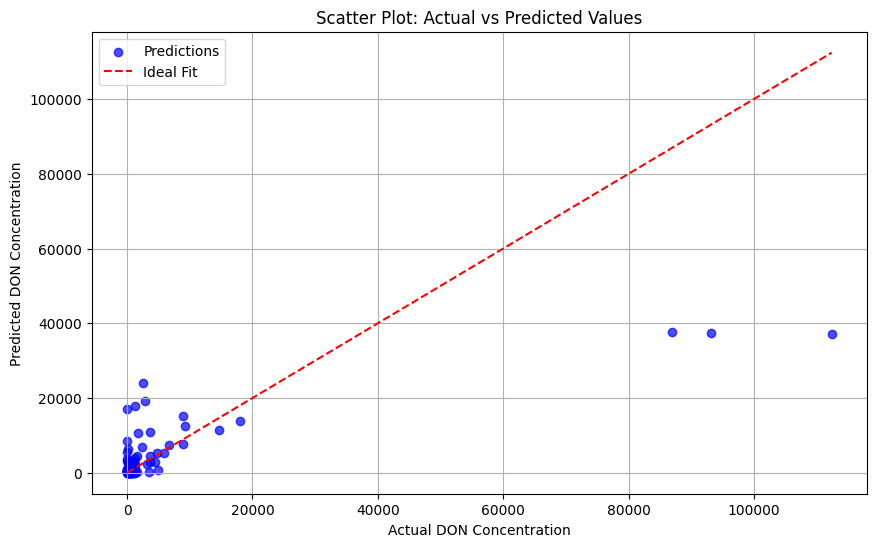

In [45]:
# 3. Visualize Results
# Scatter Plot: Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.title("Scatter Plot: Actual vs Predicted Values")
plt.xlabel("Actual DON Concentration")
plt.ylabel("Predicted DON Concentration")
plt.legend()
plt.grid()
plt.show()

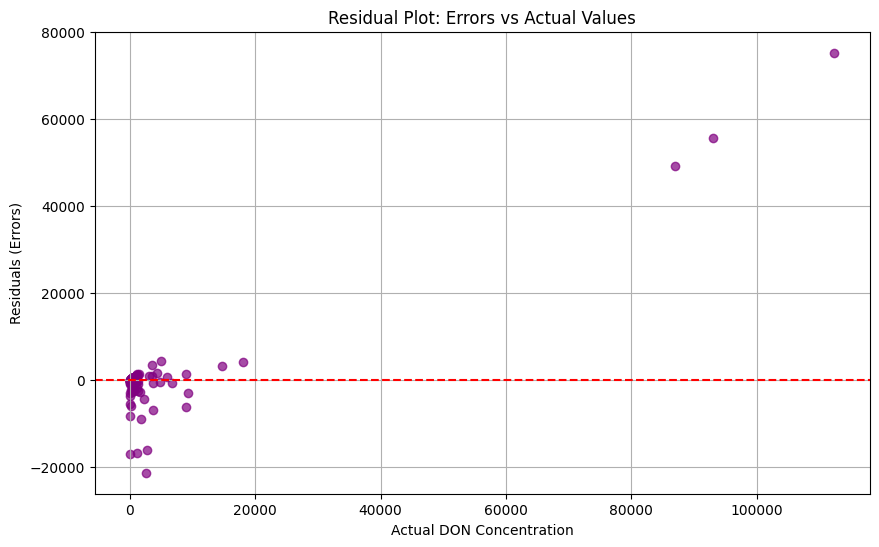

In [46]:
# 4. Residual Plot (Optional)
# This helps visualize errors in the predictions
residuals = y_test - y_pred.flatten()
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.7, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot: Errors vs Actual Values")
plt.xlabel("Actual DON Concentration")
plt.ylabel("Residuals (Errors)")
plt.grid()
plt.show()